In [1]:
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [2]:
# The path to our Happiness Score CSV file
hs_file = "Data/WorldHappinessAll.csv"

# Read our Happiness Score data into pandas
hs_df = pd.read_csv(hs_file)
hs_df.head()

,Year,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia.Residual
0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,4.054
1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,3.777
2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,3.729
3,2019,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,3.781
4,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,3.790


In [3]:
# The path to our Social Progress CSV file
sp_file = "Data/2011-2020-Social-Progress-Index.csv"

# Read our Social Progress data into pandas
sp_df = pd.read_csv(sp_file, encoding = "ISO-8859-1")
sp_df.head()

,SPI Rank,Country,SPI country code,SPI year,Status,Social Progress Index,Basic Human Needs,Foundations of Wellbeing,Opportunity,Nutrition and Basic Medical Care,...,Satisfied demand for contraception (% of women),Equality of political power by socioeconomic position (0=unequal power; 4=equal power),Equality of political power by social group (0=unequal power; 4=equal power),Equality of political power by gender (0=unequal power; 4=equal power),Discrimination and violence against minorities (0=low; 10=high),Acceptance of gays and lesbians (0=low; 100=high),Quality weighted universities (points),Citable documents,Women with advanced education (%),Years of tertiary schooling
0,NaN,World,WWW,2020,NaN,64.24,74.65,60.82,57.25,84.63,...,73.8590,1.6918,1.6908,1.7663,7.3247,0.3343,223.0656,0.5025,0.5444,2.0406
1,NaN,World,WWW,2019,NaN,64.32,74.31,60.75,57.90,84.36,...,73.6103,1.8016,1.8458,1.9055,7.2709,0.3149,214.7963,0.4749,0.5308,2.0206
2,NaN,World,WWW,2018,NaN,64.05,74.06,60.54,57.54,84.04,...,73.3432,1.8182,1.8529,1.8884,7.4107,0.2772,195.1538,0.4527,0.5159,1.9994
3,NaN,World,WWW,2017,NaN,63.78,73.62,60.17,57.56,83.66,...,73.1914,1.8684,1.8280,1.9282,7.5079,0.2634,173.0154,0.4425,0.4995,1.9618
4,NaN,World,WWW,2016,NaN,63.23,73.24,59.07,57.39,83.24,...,73.0024,1.8897,1.8477,1.9353,7.5401,0.2556,158.3055,0.4252,0.4824,1.8963


In [4]:
# Check or NaN values in Happiness Score df
hs_df.count()

Year                            782
Overall rank                    782
Country or region               782
Score                           782
GDP per capita                  782
Social support                  782
Healthy life expectancy         782
Freedom to make life choices    782
Generosity                      782
Perceptions of corruption       782
Dystopia.Residual               782
dtype: int64

In [5]:
# Check for NaN values in Social Progress df
sp_df.count()

SPI Rank                                             1630
Country                                              1937
SPI country code                                     1937
SPI year                                             1937
Status                                               1927
                                                     ... 
Acceptance of gays and lesbians (0=low; 100=high)    1374
Quality weighted universities (points)               1727
Citable documents                                    1907
Women with advanced education (%)                    1847
Years of tertiary schooling                          1521
Length: 71, dtype: int64

In [6]:
# Drop NaN values for Social Progress
nonan_sp_df = sp_df.dropna()
nonan_sp_df.count()

SPI Rank                                             827
Country                                              827
SPI country code                                     827
SPI year                                             827
Status                                               827
                                                    ... 
Acceptance of gays and lesbians (0=low; 100=high)    827
Quality weighted universities (points)               827
Citable documents                                    827
Women with advanced education (%)                    827
Years of tertiary schooling                          827
Length: 71, dtype: int64

In [7]:
# Note which columns come from which df for post merge file
suffix_hs_df = hs_df.add_suffix("_HS")
suffix_nonan_sp_df = nonan_sp_df.add_suffix("_SP")

In [8]:
# Create target column to merge dataframes on year and country
suffix_nonan_sp_df["Country & Year"] = suffix_nonan_sp_df["SPI year_SP"].astype(str) + suffix_nonan_sp_df["Country_SP"]
suffix_nonan_sp_df.head()

,SPI Rank_SP,Country_SP,SPI country code_SP,SPI year_SP,Status_SP,Social Progress Index_SP,Basic Human Needs_SP,Foundations of Wellbeing_SP,Opportunity_SP,Nutrition and Basic Medical Care_SP,...,Equality of political power by socioeconomic position (0=unequal power; 4=equal power)_SP,Equality of political power by social group (0=unequal power; 4=equal power)_SP,Equality of political power by gender (0=unequal power; 4=equal power)_SP,Discrimination and violence against minorities (0=low; 10=high)_SP,Acceptance of gays and lesbians (0=low; 100=high)_SP,Quality weighted universities (points)_SP,Citable documents_SP,Women with advanced education (%)_SP,Years of tertiary schooling_SP,Country & Year
20,54.0,Albania,ALB,2020,Ranked,75.41,86.92,82.71,56.60,92.99,...,0.725,2.568,2.313,4.4,0.08,4.4,0.1717,0.5269,2.7763,2020Albania
21,51.0,Albania,ALB,2019,Ranked,75.70,86.69,82.82,57.58,92.74,...,1.283,2.454,2.323,4.3,0.10,4.4,0.1587,0.5195,2.8688,2019Albania
22,51.0,Albania,ALB,2018,Ranked,75.32,86.20,81.54,58.20,92.38,...,1.671,2.456,2.168,4.2,0.13,4.4,0.1291,0.5051,2.9191,2018Albania
23,52.0,Albania,ALB,2017,Ranked,75.38,86.19,81.53,58.43,92.14,...,1.662,2.579,2.175,4.5,0.11,4.4,0.1391,0.4913,3.1004,2017Albania
24,54.0,Albania,ALB,2016,Ranked,74.69,85.39,80.36,58.31,92.15,...,1.662,2.579,2.175,4.7,0.12,4.4,0.1618,0.4777,3.2892,2016Albania


In [9]:
# Create target column to merge dataframes on year and country
suffix_hs_df["Country & Year"] = suffix_hs_df["Year_HS"].astype(str) + suffix_hs_df["Country or region_HS"]
suffix_hs_df.head()

,Year_HS,Overall rank_HS,Country or region_HS,Score_HS,GDP per capita_HS,Social support_HS,Healthy life expectancy_HS,Freedom to make life choices_HS,Generosity_HS,Perceptions of corruption_HS,Dystopia.Residual_HS,Country & Year
0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,4.054,2019Finland
1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,3.777,2019Denmark
2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,3.729,2019Norway
3,2019,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,3.781,2019Iceland
4,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,3.790,2019Netherlands


In [10]:
# Merge data to only include countries that have data in both Social Progress and Happiness Score dfs
merge_df = pd.merge(suffix_hs_df, suffix_nonan_sp_df, on="Country & Year")
merge_df

,Year_HS,Overall rank_HS,Country or region_HS,Score_HS,GDP per capita_HS,Social support_HS,Healthy life expectancy_HS,Freedom to make life choices_HS,Generosity_HS,Perceptions of corruption_HS,...,Satisfied demand for contraception (% of women)_SP,Equality of political power by socioeconomic position (0=unequal power; 4=equal power)_SP,Equality of political power by social group (0=unequal power; 4=equal power)_SP,Equality of political power by gender (0=unequal power; 4=equal power)_SP,Discrimination and violence against minorities (0=low; 10=high)_SP,Acceptance of gays and lesbians (0=low; 100=high)_SP,Quality weighted universities (points)_SP,Citable documents_SP,Women with advanced education (%)_SP,Years of tertiary schooling_SP
0,2019,1,Finland,7.769,1.34000,1.58700,0.98600,0.59600,0.15300,0.39300,...,90.3,3.195,3.428,2.764,1.2,0.790,42.4,3.5186,0.8919,4.2892
1,2019,2,Denmark,7.600,1.38300,1.57300,0.99600,0.59200,0.25200,0.41000,...,87.6,3.544,3.750,3.318,4.3,0.880,29.8,4.5731,0.9135,4.1745
2,2019,3,Norway,7.554,1.48800,1.58200,1.02800,0.60300,0.27100,0.34100,...,88.5,3.384,3.396,3.363,3.3,0.900,31.4,4.1070,0.9434,4.0184
3,2019,5,Netherlands,7.488,1.39600,1.52200,0.99900,0.55700,0.32200,0.29800,...,88.5,3.113,2.772,2.746,4.2,0.900,62.2,3.2448,0.9065,4.1465
4,2019,6,Switzerland,7.480,1.45200,1.52600,1.05200,0.57200,0.26300,0.34300,...,88.7,2.958,3.449,2.866,3.3,0.790,49.0,5.1351,0.9103,2.8077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,2015,132,Sri Lanka,4.271,0.83524,1.01905,0.70806,0.53726,0.09179,0.40828,...,71.9,2.226,1.823,1.856,9.3,0.050,4.6,0.0575,0.5884,0.9448
367,2015,133,Cameroon,4.252,0.42250,0.88767,0.23402,0.49309,0.05786,0.20618,...,44.3,1.255,1.178,2.027,8.1,0.050,2.2,0.0491,0.2594,0.7646
368,2015,146,Tanzania,3.781,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,...,54.0,2.190,2.633,2.185,5.7,0.050,2.6,0.0253,0.1719,0.1838
369,2015,152,Burkina Faso,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,...,44.6,2.515,2.614,1.460,5.0,0.080,2.2,0.0258,0.0181,0.2724


In [11]:
# Export file as a CSV, without the Pandas index, but with the header
merge_df.to_csv("Data/merge.csv", index=False, header=True)

In [12]:
country_compare_df = merge_df[['Country or region_HS', 'Country_SP']]
country_compare_df.count()

Country or region_HS    371
Country_SP              371
dtype: int64

In [13]:
den_file = "Data/population_density.csv"

# Read our Social Progress data into pandas
density_df = pd.read_csv(den_file, encoding = "ISO-8859-1")
density_df

,Index,Variant,"Region, subregion, country or area *",Country code,Type,Parent code,1950,1951,1952,1953,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Estimates,WORLD,900,World,0,19.496907,19.862821,20.222771,20.582107,...,54.123887,54.774445,55.425929,56.077063,56.726641,57.374057,58.018491,58.658276,59.291488,59.916655
1,18,Estimates,Africa,903,Region,1840,7.683164,7.836080,7.996921,8.165425,...,35.968443,36.910593,37.878674,38.869904,39.881935,40.914087,41.965802,43.034954,44.119096,45.216418
2,19,Estimates,Asia,935,Region,1840,45.271262,46.267296,47.202255,48.106489,...,137.117638,138.576485,140.022331,141.452034,142.862650,144.252535,145.619855,146.961232,148.272866,149.551613
3,20,Estimates,Europe,908,Region,1840,24.817318,25.043009,25.285606,25.538040,...,33.334266,33.396364,33.455849,33.513514,33.569566,33.624222,33.675994,33.721383,33.755870,33.776346
4,21,Estimates,Latin America and the Caribbean,904,Region,1840,8.382603,8.604058,8.834226,9.072215,...,29.692790,30.020742,30.345701,30.666095,30.980784,31.289156,31.591478,31.888586,32.181755,32.471803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,285,Estimates,Bermuda,60,Country/Area,918,745.120000,756.000000,768.740000,782.840000,...,1301.520000,1294.740000,1287.620000,1280.760000,1273.900000,1267.200000,1260.800000,1255.260000,1250.160000,1245.460000
268,286,Estimates,Canada,124,Country/Area,918,1.510242,1.548186,1.588545,1.631373,...,3.798220,3.840325,3.881508,3.921955,3.961800,4.000979,4.039374,4.077035,4.114037,4.150450
269,287,Estimates,Greenland,304,Country/Area,918,0.056019,0.057171,0.058316,0.059605,...,0.137788,0.137598,0.137439,0.137369,0.137357,0.137430,0.137588,0.137812,0.138044,0.138316
270,288,Estimates,Saint Pierre and Miquelon,666,Country/Area,918,19.856522,20.039130,20.208696,20.339130,...,27.491304,27.178261,26.817391,26.404348,26.052174,25.795652,25.586957,25.413043,25.308696,25.195652


In [14]:
country_df = density_df.loc[density_df['Type'] == 'Country/Area']
rename_country = country_df.rename(columns={'Region, subregion, country or area *':'Country'})

In [15]:
clean_country = rename_country[['Country','2015', '2016', '2017', '2018', '2019']]
clean_country['Country'] = clean_country['Country'].replace({'United States of America':'United States'})
clean_country['Country'] = clean_country['Country'].replace({'United Republic of Tanzania':'Tanzania'})
clean_country['Country'] = clean_country['Country'].replace({'Russian Federation':'Russia'})
density_2015 = clean_country[['Country', '2015']]
density_2016 = clean_country[['Country', '2016']]
density_2017 = clean_country[['Country', '2017']]
density_2018 = clean_country[['Country', '2018']]
density_2019 = clean_country[['Country', '2019']]
density_2019['Country']

C:\Users\16129\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\16129\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\16129\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

9                        Burundi
10                       Comoros
11                      Djibouti
12                       Eritrea
13                      Ethiopia
                 ...            
267                      Bermuda
268                       Canada
269                    Greenland
270    Saint Pierre and Miquelon
271                United States
Name: Country, Length: 235, dtype: object

In [16]:
density_2015 = density_2015.rename(columns={'2015':'Population Density'})
density_2016 = density_2016.rename(columns={'2016':'Population Density'})
density_2017 = density_2017.rename(columns={'2017':'Population Density'})
density_2018 = density_2018.rename(columns={'2018':'Population Density'})
density_2019 = density_2019.rename(columns={'2019':'Population Density'})
density_2019.loc[density_2019['Country'] == 'Russia']

,Country,Population Density
222,Russia,8.907212


In [28]:
density_2015['Country & Year'] = ('2015')+density_2015['Country']
density_2016['Country & Year'] = ('2016')+density_2016['Country']
density_2017['Country & Year'] = ('2017')+density_2017['Country']
density_2018['Country & Year'] = ('2018')+density_2018['Country']
density_2019['Country & Year'] = ('2019')+density_2019['Country']
density_2015.loc[(density_2015['Country'] == 'Finland') | 
                 (density_2015['Country'] == 'Denmark') |
                 (density_2015['Country'] == 'Norway')  |
                 (density_2015['Country'] == 'Iceland')]

,Country,Population Density,Country & Year
227,Denmark,134.072472,2015Denmark
230,Finland,18.036553,2015Finland
231,Iceland,3.294135,2015Iceland
236,Norway,14.235649,2015Norway


In [18]:
v1 = density_2015.append(density_2016)

In [19]:
v2 = v1.append(density_2017)

In [20]:
v3 = v2.append(density_2018)

In [21]:
v4 = v3.append(density_2019)

In [22]:
v4

,Country,Population Density,Country & Year
9,Burundi,395.639953,2015Burundi
10,Comoros,417.751209,2015Comoros
11,Djibouti,39.430457,2015Djibouti
12,Eritrea,33.097208,2015Eritrea
13,Ethiopia,100.835453,2015Ethiopia
...,...,...,...
267,Bermuda,1250.160000,2019Bermuda
268,Canada,4.114037,2019Canada
269,Greenland,0.138044,2019Greenland
270,Saint Pierre and Miquelon,25.308696,2019Saint Pierre and Miquelon


In [23]:
new_merge = merge_df
new_merge['Country & Year'] = new_merge["Year_HS"].astype(str) + new_merge["Country or region_HS"]

In [24]:
combined_merge = pd.merge(v4, new_merge, on="Country & Year", how='right')
combined_merge

,Country,Population Density,Country & Year,Year_HS,Overall rank_HS,Country or region_HS,Score_HS,GDP per capita_HS,Social support_HS,Healthy life expectancy_HS,...,Satisfied demand for contraception (% of women)_SP,Equality of political power by socioeconomic position (0=unequal power; 4=equal power)_SP,Equality of political power by social group (0=unequal power; 4=equal power)_SP,Equality of political power by gender (0=unequal power; 4=equal power)_SP,Discrimination and violence against minorities (0=low; 10=high)_SP,Acceptance of gays and lesbians (0=low; 100=high)_SP,Quality weighted universities (points)_SP,Citable documents_SP,Women with advanced education (%)_SP,Years of tertiary schooling_SP
0,Mauritius,620.422168,2015Mauritius,2015,71,Mauritius,5.477,1.00761,0.98521,0.70950,...,48.7,2.486,2.578,1.985,3.8,0.330,0.8,0.1673,0.4833,2.0022
1,Rwanda,460.845805,2015Rwanda,2015,154,Rwanda,3.465,0.22208,0.77370,0.42864,...,62.2,1.517,0.613,2.571,8.8,0.065,1.6,0.0226,0.0815,0.4328
2,Tanzania,58.119935,2015Tanzania,2015,146,Tanzania,3.781,0.28520,1.00268,0.38215,...,54.0,2.190,2.633,2.185,5.7,0.050,2.6,0.0253,0.1719,0.1838
3,Cameroon,49.286827,2015Cameroon,2015,133,Cameroon,4.252,0.42250,0.88767,0.23402,...,44.3,1.255,1.178,2.027,8.1,0.050,2.2,0.0491,0.2594,0.7646
4,Lesotho,67.819862,2015Lesotho,2015,97,Lesotho,4.898,0.37545,1.04103,0.07612,...,77.9,2.943,3.168,2.333,4.4,0.192,0.2,0.0166,0.2654,0.6616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,Germany,239.605939,2019Germany,2019,17,Germany,6.985,1.37300,1.45400,0.98700,...,90.9,3.160,3.453,3.160,4.6,0.730,275.0,1.9926,0.9075,3.2649
367,Netherlands,507.032117,2019Netherlands,2019,5,Netherlands,7.488,1.39600,1.52200,0.99900,...,88.5,3.113,2.772,2.746,4.2,0.900,62.2,3.2448,0.9065,4.1465
368,Switzerland,217.414743,2019Switzerland,2019,6,Switzerland,7.480,1.45200,1.52600,1.05200,...,88.7,2.958,3.449,2.866,3.3,0.790,49.0,5.1351,0.9103,2.8077
369,Canada,4.114037,2019Canada,2019,9,Canada,7.278,1.36500,1.50500,1.03900,...,90.9,3.183,2.597,2.895,2.8,0.880,117.4,2.6788,0.9245,3.3504


In [25]:
pop_den = combined_merge['Population Density'].astype('float64')
hap_score = combined_merge['Score_HS'].astype('float64')
sp_index = combined_merge['Social Progress Index_SP'].astype('float64')

 The R Value is:-0.0762830343955701


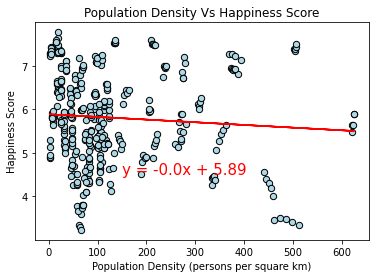

In [26]:
slope, intercept, rvalue, pvalue, stderr = linregress(pop_den, hap_score)
regress_values = pop_den * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(pop_den, hap_score, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.plot(pop_den,regress_values,"r-")
plt.annotate(line_eq,(150,4.5),fontsize=15,color="red")
plt.title("Population Density Vs Happiness Score")
plt.xlabel("Population Density (persons per square km)")
plt.ylabel("Happiness Score")
print(f" The R Value is:{rvalue}")
plt.show()

 The R Value is:-0.11723458156902687


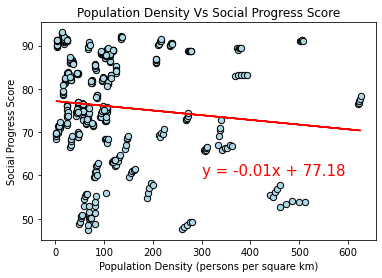

In [27]:
slope, intercept, rvalue, pvalue, stderr = linregress(pop_den, sp_index)
regress_values = pop_den * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(pop_den, sp_index, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.plot(pop_den,regress_values,"r-")
plt.annotate(line_eq,(300,60),fontsize=15,color="red")
plt.title("Population Density Vs Social Progress Score")
plt.xlabel("Population Density (persons per square km)")
plt.ylabel("Social Progress Score")
print(f" The R Value is:{rvalue}")
plt.show()